In [1]:
import pandas as pd
#import matplotlib.pyplot
import numpy as np
import geopandas as gpd
#from geopandas import *
from shapely.geometry import Point, LineString
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\intern_exam\invento_labs\DIP.csv",low_memory=False,parse_dates=['device_time_stamp'])
print (df.columns)

Index(['track_record_id', 'status_code', 'latitude_gps', 'longitude_gps',
       'device_id_x', 'device_time_stamp', 'asset_type',
       'packet_generating_station_id', 'track_num1', 'asset_id_project',
       'project_id', 'supportsite_id'],
      dtype='object')


In [3]:
cols = [x for x in df.columns]

In [4]:
print (cols)

['track_record_id', 'status_code', 'latitude_gps', 'longitude_gps', 'device_id_x', 'device_time_stamp', 'asset_type', 'packet_generating_station_id', 'track_num1', 'asset_id_project', 'project_id', 'supportsite_id']


In [5]:
df['latitude_gps'].value_counts()

0              43136
28.14192963     2344
28.14192009     2248
28.14191055     2193
28.14193916     1997
28.14189911     1866
28.14195061     1728
28.19042969     1696
28.19042015     1633
28.14188957     1575
28.19041061     1549
28.19043922     1514
28.14175034     1439
28.14188004     1391
28.14196014     1381
28.14176941     1345
28.14175987     1322
28.14149094     1289
28.14178085     1247
28.14150047     1243
28.14138985     1234
28.19045067     1229
28.14147949     1229
28.09966087     1221
28.14146996     1215
28.09939003     1211
28.14197922     1206
28.14196968     1191
28.14138031     1168
28.19039917     1167
               ...  
28.1480999         1
28.20055008        1
0.09906            1
28.15166092        1
28.12730026        1
28.12472916        1
28.18844032        1
28.11657906        1
28.11634064        1
28.18317032        1
28.19952011        1
20.9160099         1
28.2018795         1
28.17222977        1
28.13072968        1
20.91159058        1
28.15967941  

In [6]:
print (df.head(10))
df.dropna(inplace=True)

  track_record_id status_code latitude_gps longitude_gps device_id_x  \
0        59231753       61441            0             0  1001020218   
1        59231858       61441            0             0  1001020218   
2        59231969       61441            0             0  1001020218   
3        59232069       61441            0             0  1001020218   
4        59232173       61441            0             0  1001020218   
5        59232274       61441            0             0  1001020218   
6        59232385       61441            0             0  1001020218   
7        59232489       61441            0             0  1001020218   
8        59232588       61441            0             0  1001020218   
9        59232688       61441            0             0  1001020218   

  device_time_stamp asset_type packet_generating_station_id track_num1  \
0   12/13/2017 0:00       4111                 411100000001          0   
1   12/13/2017 0:01       4111                 411100000001

In [7]:
unique_device_ids = [ udid for udid in df.device_id_x.unique()]

In [8]:
print (len(unique_device_ids))

39


In [22]:
# df_analysis = df.groupby(['device_id_x'])['geometry'].apply(lambda x: LineString(x.tolist()) if x.size > 1 else x.tolist())
counter = 0
coords = []
df_plot = pd.DataFrame(columns=["Device_ID", "Distance_covered","TimeON","daysLogged"])
for item in unique_device_ids:
    #item = str(item)
    df_item = pd.DataFrame()
    df_item_update = pd.DataFrame()
    df_item = df.loc[df['device_id_x'] == item]
       
    #print ("Deleting {0} rows because longitude_gps had 0 values".format(len(df_item[df_item['longitude_gps'] == '0'])))
    df_item = df_item.loc[df['latitude_gps'] != '0']
    df_item = df_item.loc[df_item['longitude_gps'] != 0]
    df_item = df_item.loc[df['latitude_gps'] != 'a']
    df_item = df_item.loc[df_item['longitude_gps'] != 'a']
    df_item = df_item.loc[df['latitude_gps'] != 'latitude_gps']
    df_item = df_item.loc[df_item['longitude_gps'] != 'longitude_gps']
    df_item = df_item.loc[df_item['device_time_stamp'] != 'device_time_stamp']
    df_item.dropna(axis=0,subset=['device_id_x','device_time_stamp'],inplace=True)
    #df_item.dropna(subset=['device_time_stamp'],inplace=True)
    
    df_item['latitude_gps'] = df_item['latitude_gps'].str.strip("'")
    df_item['longitude_gps'] = df_item['longitude_gps'].str.strip("'")
    
    df_item['latitude_gps'] = df_item['latitude_gps'].astype(float)
    df_item['longitude_gps'] = df_item['longitude_gps'].astype(float)
    df_item.sort_values(by=['device_time_stamp'])
    
    df_item['date']  = pd.to_datetime(df_item['device_time_stamp'])
    df_item['device_time_stamp'] = df_item['device_time_stamp'].astype(str)
    
    print (df_item['date'].max(),df_item['date'].min())
    
    dtype_df = df_item['date'].dtype
    #if dtype_df == NaT
    print (dtype_df)
    max_date =  (df_item['date'].max()) # .str.split('/')[1])
    
    min_date = (df_item['date'].min())#.str.split('/')[1])
    days = (max_date - min_date).days
    if days == 0:
        days = 1
    print (days)

    df_time = (df_item['track_num1'].astype(int).sum())/3600
    from functools import partial
    import pyproj
    from shapely.ops import transform

    project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:4326'), # source coordinate system
    pyproj.Proj(init='epsg:32643')) # destination coordinate system

    
    
    for i, row in df_item.iterrows():
        coords.append((row['longitude_gps'], row['latitude_gps']))
    linestring = LineString(coords)
    linestring = transform(project, linestring)  # apply projection
    
    for id in df_item['device_id_x'].unique():
        device_id = str(id).strip()
    
    if device_id is not None:
        device_id = device_id
    else:
        device_id = counter
    counter = counter + 1
    device_dist = (linestring.length)/days
    
    
    df_plot = df_plot.append({
     "Device_ID": device_id,
     "Distance_covered":  device_dist,
    "TimeON": df_time,
        "daysLogged": days
      }, ignore_index=True)
    #print ("Device ID: {0},     Device Time Stamps: {1},     Device distance travelled: {2} metres".format(df_item['device_id_x'].unique(),df_item['device_time_stamp'].unique(),linestring.length))


2017-12-14 09:40:00 2017-12-13 10:24:00
datetime64[ns]
1
NaT NaT
datetime64[ns]
nan
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-14 10:59:00 2017-12-13 00:00:00
datetime64[ns]
1
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017-12-17 23:59:00 2017-12-13 00:00:00
datetime64[ns]
4
2017

<Figure size 1440x720 with 0 Axes>

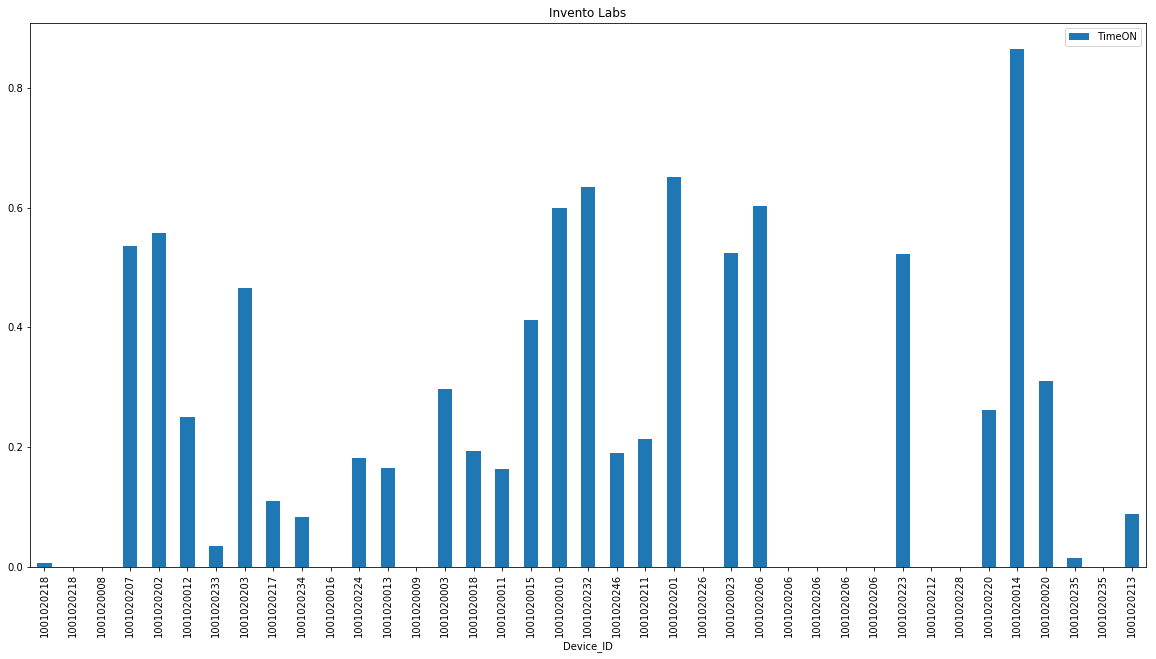

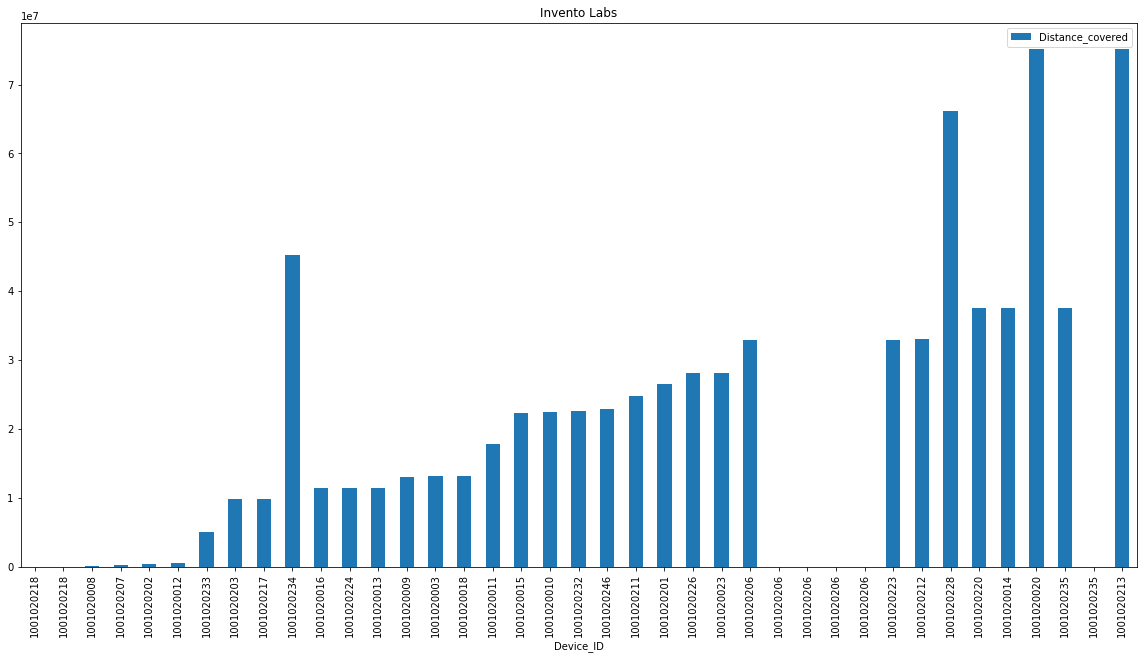

,Device_ID,Distance_covered,TimeON
0,1001020218,6.882953e+02,0.006389
1,1001020218,NaN,0.000000
2,1001020008,9.569804e+04,0.000000
3,1001020207,2.362388e+05,0.536667
4,1001020202,4.087676e+05,0.558333
5,1001020012,4.809214e+05,0.250833
6,1001020233,5.063001e+06,0.034167
7,1001020203,9.756075e+06,0.465556
8,1001020217,9.760742e+06,0.108889
9,1001020234,4.529362e+07,0.082500


In [19]:

plt.figure(figsize=(20,10))
df_plot_time = df_plot[['TimeON','Device_ID']]
df_plot_time.set_index('Device_ID',inplace=True)

df_plot_dist = df_plot[['Distance_covered','Device_ID']]
df_plot_dist.set_index('Device_ID',inplace=True)

df_plot_time.plot(kind="bar", title="Invento Labs",figsize=(20,10))
df_plot_dist.plot(kind="bar", title="Invento Labs",figsize=(20,10))

plt.show()

df_plot

In [2]:
from geopandas import GeoDataFrame

ImportError: cannot import name 'GeoDataFrame'

In [3]:
import fiona